In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [133]:
# Generate a random time series dataset
np.random.seed(0)
n = 365
t = np.arange(n)
data = 10 + 0.5 * t + np.random.normal(0, 1, n)

# Create a DataFrame
df = pd.DataFrame({'timestamp': pd.date_range(start='2023-01-01', periods=n, freq='D'),
                   'data': data})

In [134]:
df.head()

,timestamp,data
0,2023-01-01,11.764052
1,2023-01-02,10.900157
2,2023-01-03,11.978738
3,2023-01-04,13.740893
4,2023-01-05,13.867558


In [135]:
# Data Preprocessing : 

df.isna().sum()

timestamp    0
data         0
dtype: int64

In [136]:
# For Data Preprocessing :

# a)  Handling Missing we can try this 
# Handling Missing Values
df['data'].fillna(method='ffill', inplace=True)

In [137]:
# b) : Handling Outliers :

# Handling Outliers (Assuming a z-score-based approach)
from scipy.stats import zscore
z_scores = zscore(df['data'])
df['data'] = np.where(np.abs(z_scores) > 3, np.nan, df['data'])

In [138]:
# Handling Time Zones
df['timestamp'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

In [139]:
df.head()

,timestamp,data
0,2023-01-01 05:30:00+05:30,11.764052
1,2023-01-02 05:30:00+05:30,10.900157
2,2023-01-03 05:30:00+05:30,11.978738
3,2023-01-04 05:30:00+05:30,13.740893
4,2023-01-05 05:30:00+05:30,13.867558


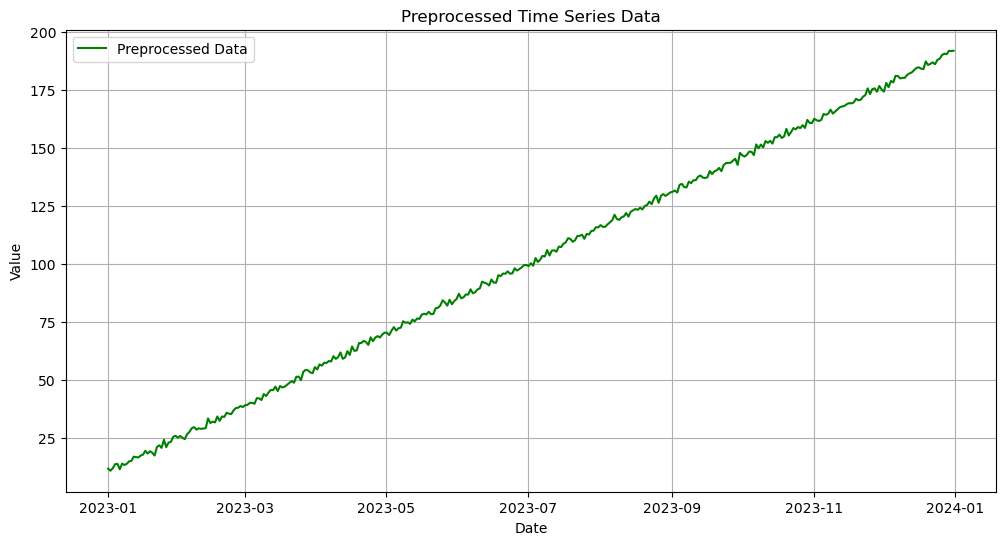

In [140]:
# Let do data Visualization : 

# Visualize the preprocessed data
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['data'], label='Preprocessed Data', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Preprocessed Time Series Data')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
# Check Seasonal Pattern: 
# No seasonal Patter found using stl method 


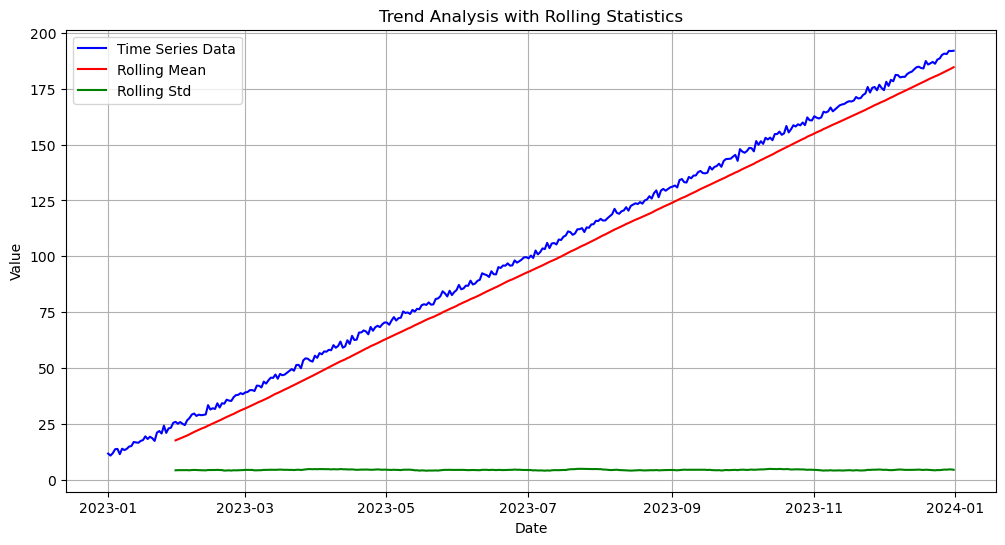

In [142]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['data'].rolling(window=30).mean()
rolling_std = df['data'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['data'], label='Time Series Data', color='blue')
plt.plot(df['timestamp'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(df['timestamp'], rolling_std, label='Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend Analysis with Rolling Statistics')
plt.legend()
plt.grid(True)
plt.show()


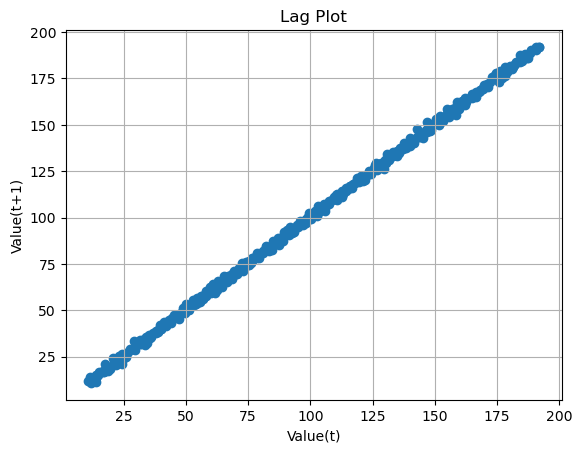

In [143]:

# Lag plot 
from pandas.plotting import lag_plot

# Create a lag plot
lag_plot(df['data'])
plt.xlabel('Value(t)')
plt.ylabel('Value(t+1)')
plt.title('Lag Plot')
plt.grid(True)
plt.show()


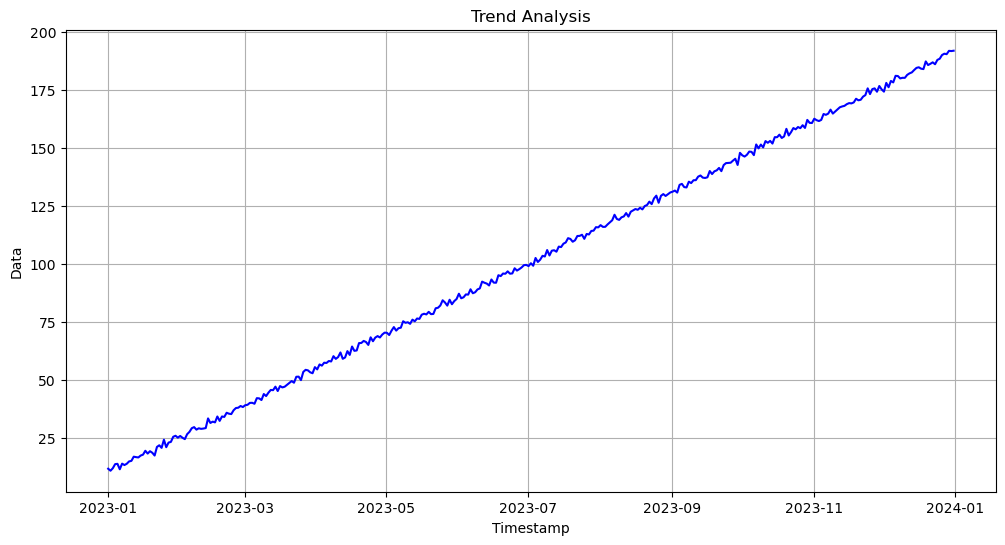

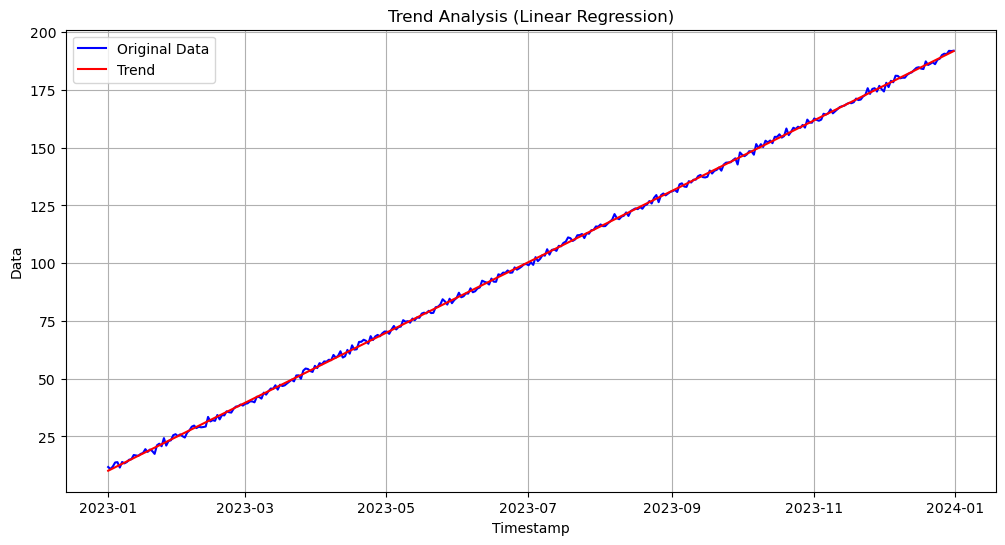

In [144]:
# Trend Analysis - Using Linear Regression : 
from sklearn.linear_model import LinearRegression

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['data'], label='Original Data', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Data')
plt.title('Trend Analysis')
plt.grid(True)

# Fit a linear regression model for trend analysis
X = np.arange(len(df)).reshape(-1, 1)
y = df['data'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['data'], label='Original Data', color='blue')
plt.plot(df['timestamp'], trend, label='Trend', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Data')
plt.title('Trend Analysis (Linear Regression)')
plt.grid(True)
plt.legend()
plt.show()

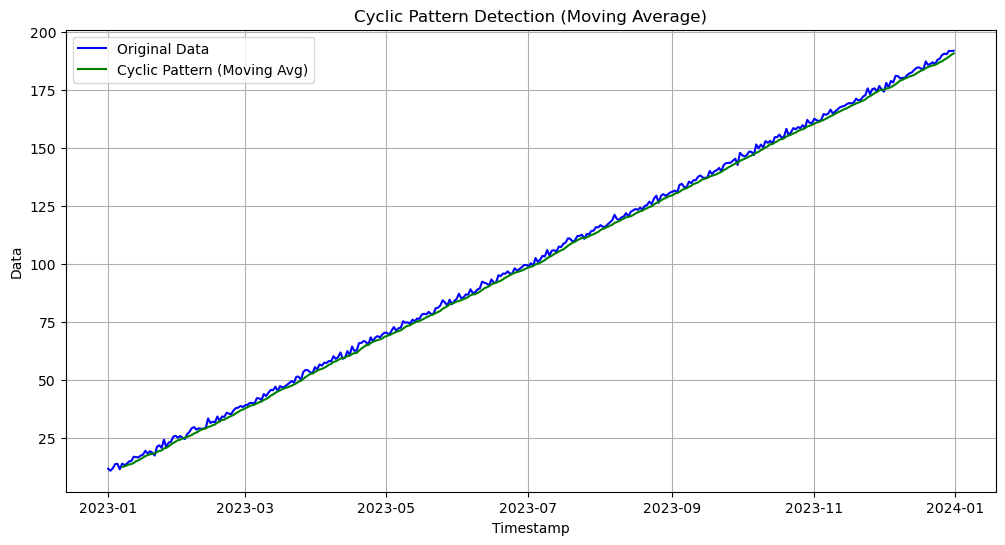

In [145]:
# Cyclic Analysis

# Define the window size for moving average
window = 7

# Calculate the cyclic pattern using a simple moving average
cyclic_pattern = df['data'].rolling(window=window).mean()

# Plot the original data and cyclic pattern
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['data'], label='Original Data', color='blue')
plt.plot(df['timestamp'], cyclic_pattern, label='Cyclic Pattern (Moving Avg)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Data')
plt.title('Cyclic Pattern Detection (Moving Average)')
plt.legend()
plt.grid(True)
plt.show()


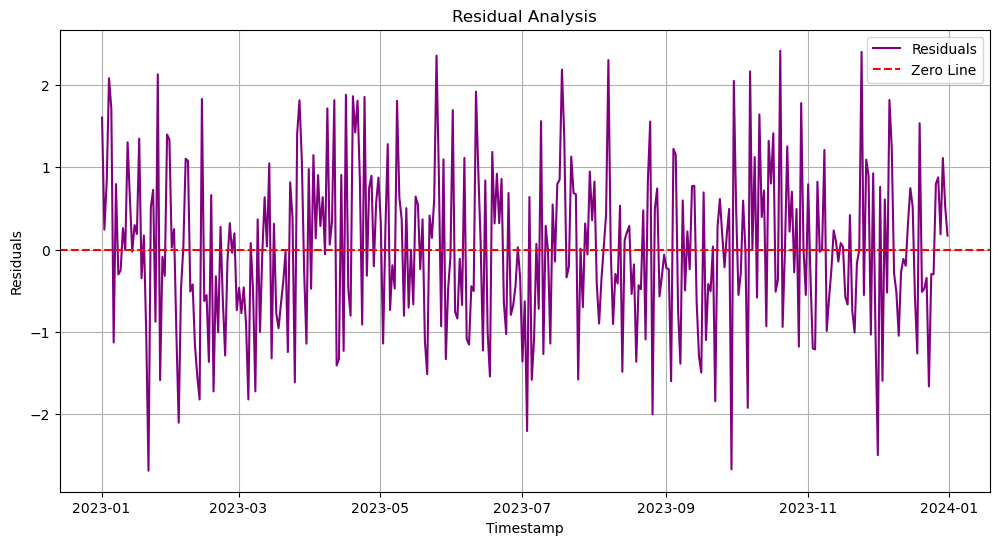

In [146]:
# Fit a linear regression model for trend analysis
X = np.arange(len(df)).reshape(-1, 1)
y = df['data'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Calculate residuals
residuals = df['data'] - trend.flatten()

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
def analyze_time_series(ts):

    # Decompose the time series into its components
    decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Check for trend
    trend_detected = any(abs(trend.dropna()) > 0.1)
    
    # Check for seasonality
    seasonal_detected = any(abs(seasonal.dropna()) > 0.1)
    
    # Check for cyclic pattern
    cyclic_detected = any(abs(residual.dropna()) > 0.1)
    
    # Check for residuals
    residual_detected = any(abs(residual.dropna()) > 0.1)
    
    analysis = ""
    
    if trend_detected:
        analysis += "Trend detected."
    
    if seasonal_detected:
        analysis += " Seasonality detected."
    
    if cyclic_detected:
        analysis += " Cyclic pattern detected."
    
    if residual_detected:
        analysis += " Residuals detected."
    
    if not (trend_detected or seasonal_detected or cyclic_detected or residual_detected):
        analysis = "No trend, seasonality, cyclic pattern, or residuals detected."
    
    return analysis


In [148]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')


In [149]:
df.head()

,data
timestamp,
2023-01-01 05:30:00+05:30,11.764052
2023-01-02 05:30:00+05:30,10.900157
2023-01-03 05:30:00+05:30,11.978738
2023-01-04 05:30:00+05:30,13.740893
2023-01-05 05:30:00+05:30,13.867558


In [151]:
import statsmodels.api as sm

analyze_time_series(df.data)

# Now we can say our time data we detected this things

'Trend detected. Seasonality detected. Cyclic pattern detected. Residuals detected.'